In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import colors
import matplotlib.ticker as ticker
import urllib3
import json

In [2]:
ruta = "C:/Users/CO-149//Downloads/Hojas de Vida Creadas (2).csv"
hv = pd.read_csv(ruta)
display(hv)

C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\2179121600.py:2: DtypeWarning: Columns (5,12,17,18,26,27,31,33,34,35,36,37,38,39,42,63,72,75,77,79,81,85,86,91,92,94,95,96,97,98,99,100,101,103,104,108,109,110,111,112,116,118,119,120,121,126,127,128,130,132) have mixed types. Specify dtype option on import or set low_memory=False.
  hv = pd.read_csv(ruta)


,Primer Apellido,Segundo Apellido,Primer Nombre,Segundo Nombre,Tipo de Documento,No identificación,Nacionalidad,No Pasaporte,Fecha de Nacimiento,Edad,...,HV bloqueada todos los procesos,Importada,Observaciones.1,Ultimo titulo obtenido,Por donde se entero,Observaciones internas,Modified User IP Address,Added User IP Address,Fondo de cesantías,Cargos
0,ESPITIA,MUNZA,SHARON,CAMILO,CEDULA DE CIUDADANIA,1076670237,Colombia,NaN,15/07/1999,23.0,...,False,False,NaN,NaN,NaN,NaN,201.184.98.76,201.184.98.76,NaN,NaN
1,ORTEGA,HERNANDEZ,EDITH,DELFINA,CEDULA DE CIUDADANIA,1033724167,Colombia,NaN,05/07/1990,32.0,...,False,False,NaN,NaN,NaN,NaN,201.184.98.76,201.184.98.76,NaN,NaN
2,SARAVIA,NaN,WILSON,ANTONIO,CEDULA DE CIUDADANIA,88239301,Colombia,NaN,21/09/1979,43.0,...,False,False,NaN,NaN,NaN,NaN,186.83.184.80,186.83.184.80,NaN,MEMPHIS PRODUCTS S.A || AUXILIAR D EPLANTA ||...
3,CUEVAS,CAMACHO,YEISON,ESTEBEN,CEDULA DE CIUDADANIA,1070988591,Colombia,NaN,22/05/1999,23.0,...,False,False,NaN,NaN,NaN,NaN,201.184.98.76,201.184.98.76,NaN,NaN
4,BARRANTES,CICUA,CLAUDIA,CONSTANZA,CEDULA DE CIUDADANIA,52425780,Colombia,NaN,19/10/1977,45.0,...,False,False,NaN,NaN,NaN,NaN,201.244.116.140,201.244.116.140,NaN,ORGANIZACION SERVICIOS Y ASESORIAS || SUPERVIS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75967,GARZON,VARGAS,YULIANA,ANDREA,CEDULA DE CIUDADANIA,37292765,Colombia,NaN,27/03/1988,32.0,...,False,False,NaN,NaN,NaN,NaN,201.184.98.76,191.95.169.110,NaN,NEGOCIO FAMILIAR || VENDEDOR DE MOSTRADOR ||...
75968,TEST,GUZMAN,TEST,ANDRES,CEDULA DE CIUDADANIA,22222,Colombia,NaN,08/11/1997,24.0,...,False,False,NaN,NaN,NaN,NaN,201.184.98.76,201.184.98.74,NaN,NaN
75969,PEREZ,GUZMAN,JUAN,ANDRES,CEDULA DE CIUDADANIA,11111,Colombia,NaN,08/11/1997,23.0,...,False,False,NaN,NaN,NaN,NaN,201.184.98.76,201.184.98.74,NaN,NaN
75970,DANIEL,FELIPE,GOMEZ,SUAREZ,CEDULA DE CIUDADANIA,100000001,Colombia,NaN,13/11/1997,24.0,...,False,False,NaN,NaN,NaN,NaN,201.184.98.76,45.238.183.27,NaN,COOMPHIA || ANALISTA DE RECLUTAMIENTO || 08/07...


In [3]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
        (" ", "_"),
        ("ñ","n"),
        ("(", ""),
        (")", ""),
        (",", ""),
        (".", "")
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.lower(), b.lower()).lower()
    return s

#candidatos_001.info()
hv.columns
column_names = []
for x in hv.columns:
     y = normalize(x)
     column_names.append(y)

hv.columns = column_names
hv.head(5)

,primer_apellido,segundo_apellido,primer_nombre,segundo_nombre,tipo_de_documento,no_identificacion,nacionalidad,no_pasaporte,fecha_de_nacimiento,edad,...,hv_bloqueada_todos_los_procesos,importada,observaciones1,ultimo_titulo_obtenido,por_donde_se_entero,observaciones_internas,modified_user_ip_address,added_user_ip_address,fondo_de_cesantias,cargos
0,ESPITIA,MUNZA,SHARON,CAMILO,CEDULA DE CIUDADANIA,1076670237,Colombia,NaN,15/07/1999,23.0,...,False,False,NaN,NaN,NaN,NaN,201.184.98.76,201.184.98.76,NaN,NaN
1,ORTEGA,HERNANDEZ,EDITH,DELFINA,CEDULA DE CIUDADANIA,1033724167,Colombia,NaN,05/07/1990,32.0,...,False,False,NaN,NaN,NaN,NaN,201.184.98.76,201.184.98.76,NaN,NaN
2,SARAVIA,NaN,WILSON,ANTONIO,CEDULA DE CIUDADANIA,88239301,Colombia,NaN,21/09/1979,43.0,...,False,False,NaN,NaN,NaN,NaN,186.83.184.80,186.83.184.80,NaN,MEMPHIS PRODUCTS S.A || AUXILIAR D EPLANTA ||...
3,CUEVAS,CAMACHO,YEISON,ESTEBEN,CEDULA DE CIUDADANIA,1070988591,Colombia,NaN,22/05/1999,23.0,...,False,False,NaN,NaN,NaN,NaN,201.184.98.76,201.184.98.76,NaN,NaN
4,BARRANTES,CICUA,CLAUDIA,CONSTANZA,CEDULA DE CIUDADANIA,52425780,Colombia,NaN,19/10/1977,45.0,...,False,False,NaN,NaN,NaN,NaN,201.244.116.140,201.244.116.140,NaN,ORGANIZACION SERVICIOS Y ASESORIAS || SUPERVIS...


## Objetivo: obtener un texto para extraer palabras claves según la requisición

### Genero

In [4]:
def predecir_genero(primerNombre, segundoNombre = "", imprimir = False):
    tablaTemporal = hv[(hv["primer_nombre"] == primerNombre) & (hv["genero_de_nacimiento"] != "NaN")]
    count = 0
    progress = 0
    maxValue = len(tablaTemporal)
    masculino = 0
    femenino = 0
    http = urllib3.PoolManager()
    for row in tablaTemporal.index:
        if(tablaTemporal["genero_de_nacimiento"][row] == "MASCULINO"):
            count += 1
        else:
            count -= 1
    if(count == 0):
        url = "https://api.genderize.io/?name=" + primerNombre
        gender = json.loads(http.request('GET', url).data.decode('utf-8')).get("gender")
        if(gender == "female"):
            response = "FEMENINO"
        elif(gender == "male"):
            response = "MASCULINO"
        else:
            response = "NaN"
    elif(count > 0):
        response = "MASCULINO"
    else:
        response = "FEMENINO"
    return response

table = hv[hv.genero_de_nacimiento.isnull()]
total = table.index.max()
for x in table.index:
    hv["genero_de_nacimiento"][x] = predecir_genero(str(hv["primer_nombre"][x]))

C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\620788629.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["genero_de_nacimiento"][x] = predecir_genero(str(hv["primer_nombre"][x]))


In [5]:
hv["genero_femenino"] = np.where(hv["genero_de_nacimiento"] == "FEMENINO", 1, 0)

In [6]:
x= 0
hv["num_cargos"] = 0
for index in range(0, len(hv)):
    if (type(hv["cargos"][index]) == str):
        hv["num_cargos"][index] = hv["cargos"][index].count("| ,") + 1
    else: 
        hv["num_cargos"][index] = 0

C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\1455736395.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["num_cargos"][index] = 0
C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\1455736395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["num_cargos"][index] = hv["cargos"][index].count("| ,") + 1


### cantidad de cargos por persona

<AxesSubplot: xlabel='num_cargos', ylabel='Count'>

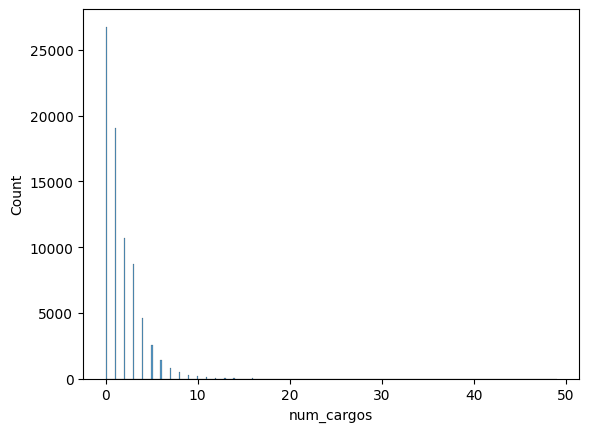

In [7]:
#Contabilizamos la catidad de trabajos que ha tenido hasta la fecha
Experiencia = "cargos"
var_ref = "num_cargos"
hv[[Experiencia, var_ref]].describe()
sns.histplot(hv["num_cargos"])

### lista cargos

In [8]:
def stringToList(cargosString):
    ''' Convierne en matriz la experiencia donde cada vector es un registro de experiencia '''
    try:
        cargos = cargosString.split("|| ,")
        listaCargos = []
        for cargo in cargos:
            listaCargos.append(cargo.split(" || "))
    except Exception as e:
        listaCargos = []
    return listaCargos

In [9]:
hv["lista_cargos"] = ""
for x in hv.index:
    if(hv["num_cargos"][x] == 0):
        hv["lista_cargos"][x] = ""
    else:
        hv["lista_cargos"][x] = stringToList(hv["cargos"][x])

C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\1166016982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["lista_cargos"][x] = ""
C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\1166016982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["lista_cargos"][x] = stringToList(hv["cargos"][x])


In [10]:
hv["lista_estudios"] = ""
for x in hv.index:
    try:
        hv["lista_estudios"][x] = stringToList(hv["historia_escolar"][x])
    except Exception as e:
        hv["lista_estudios"][x] = ""


C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\2399715235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["lista_estudios"][x] = stringToList(hv["historia_escolar"][x])


### lista estudios

In [11]:
hv["lista_estudios"]

0                                                       []
1                                                       []
2        [[MEDIA ACADEMICA (BACHILLER), 01/01/2000, 01/...
3                                                       []
4        [[TECNOLOGICA, 01/07/2018, 01/06/2019, , CURSA...
                               ...                        
75967    [[MEDIA TECNICA, 11/02/1998, 17/11/2003, BACHI...
75968     [[PROFESIONAL, 01/01/2018, , , CURSANDO, UCC, ]]
75969     [[PROFESIONAL, 01/01/2018, , , CURSANDO, UCC, ]]
75970    [[MEDIA ACADEMICA (BACHILLER), 01/01/2009, 08/...
75971    [[MEDIA TECNICA, 11/03/2020, 11/03/2020, TEST,...
Name: lista_estudios, Length: 75972, dtype: object

In [12]:
def tranforToDate(date):
    ''' Convierto la data en fecha y reordeno los datos del año '''
    dateList = date.split("/")
    day = int(dateList[0])
    mount = int(dateList[1])
    year_str = dateList[2].strip()
    if((year_str[:2] != "20") | (len(year_str) != 4)):
        if(year_str[2] != ('0','1','2')):
            new_year = "20" + year_str[2:]
        else:
            new_year = "20" + year_str[3] + year_str[2]
        year = int(new_year)
    else:
        year = int(year_str)
    return datetime(year, mount, day)

In [13]:
def calcularExperiencia(cargoList, index, imprimir = False):
    #Devuelve la experiencia en años
    try:
        totalExperiencia = 0
        experiencia = 0
        for dataCargo in cargoList:
            experienciaDias = 0
            if(dataCargo[2] != ''):
                if(dataCargo[3] == ''):
                    experienciaDias = abs((hv["added_time"][index] - tranforToDate(dataCargo[2])).days)
                else:
                    experienciaDias = abs((tranforToDate(dataCargo[3]) - tranforToDate(dataCargo[2])).days)
            else:
                experienciaDias = 0
            experiencia = experiencia + experienciaDias  # type: ignore
        totalExperiencia = experiencia/365
    except Exception as e:
        #print("error:", e, index)
        totalExperiencia = -1
    return totalExperiencia


### Experiencia

In [14]:
def text_transform(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
        (" ", " "),
        ("(", ""),
        (")", ""),
        (",", ""),
        (".", ""),
        (";", ""),
        (":", ""),
        ("  ", " ")
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.lower(), b.lower()).lower()
    return s

In [15]:
def info_experiencia(cargoList, index = 6, imprimir = False):
    ''' Concatena todos los textos en un solo bloque, elimina caracteres especiales'''
    funciones = ""
    try:
        for cargo in cargoList:
            if(cargo[6] != ""):
                funciones = funciones + " " +  text_transform(cargo[index])
            
    except Exception as e:
        funciones = ""

    return funciones

In [16]:
hv["experiencia"] = 0
hv["info_candidato"] = ""
for x in range(0, len(hv)):
    if(hv["num_cargos"][x] > 0):
        hv["info_candidato"][x] = info_experiencia(hv["lista_cargos"][x]) + " "  + info_experiencia(hv["lista_estudios"][x], index = 3)
        hv["experiencia"][x] = calcularExperiencia(hv["lista_cargos"][x], x)
    else:
        hv["experiencia"][x] = 0
hv[["experiencia", "num_cargos", "lista_cargos", "info_candidato"]]

C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\1111749480.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["experiencia"][x] = 0
C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\1111749480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["info_candidato"][x] = info_experiencia(hv["lista_cargos"][x]) + " "  + info_experiencia(hv["lista_estudios"][x], index = 3)
C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\1111749480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,experiencia,num_cargos,lista_cargos,info_candidato
0,0.000000,0,,
1,0.000000,0,,
2,6.347945,5,"[[MEMPHIS PRODUCTS S.A, AUXILIAR D EPLANTA , 0...",brindar servicio de seguridad a claro colombi...
3,0.000000,0,,
4,-1.000000,4,"[[ORGANIZACION SERVICIOS Y ASESORIAS, SUPERVIS...",todo el proceso de seguimiento a requisicione...
...,...,...,...,...
75967,9.241096,1,"[[NEGOCIO FAMILIAR , VENDEDOR DE MOSTRADOR , 0...",atencion al cliente despachos y manejo de mer...
75968,0.000000,0,,
75969,0.000000,0,,
75970,2.906849,2,"[[COOMPHIA, ANALISTA DE RECLUTAMIENTO, 08/07/2...",test test


### palabras clave candidato

In [17]:
hv["lista_palabras"] = ""
for x in hv.index:
    try:
        hv["lista_palabras"][x] = hv["info_candidato"][x].split(" ")
    except Exception as e:
        hv["lista_palabras"][x] = ""
    
hv["lista_palabras"]

C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\334500621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["lista_palabras"][x] = hv["info_candidato"][x].split(" ")


0                                                       []
1                                                       []
2        [, brindar, servicio, de, seguridad, a, claro,...
3                                                       []
4        [, todo, el, proceso, de, seguimiento, a, requ...
                               ...                        
75967    [, atencion, al, cliente, despachos, y, manejo...
75968                                                   []
75969                                                   []
75970                                   [, test, , test, ]
75971                                                 [, ]
Name: lista_palabras, Length: 75972, dtype: object

In [18]:
for x in hv.index:
    unique_sweets = []
    [unique_sweets.append(sweet) for sweet in hv["lista_palabras"][x] if sweet not in unique_sweets]
    hv["lista_palabras"][x] = unique_sweets

hv["lista_palabras"]

C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\2155204205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["lista_palabras"][x] = unique_sweets


0                                                       []
1                                                       []
2        [, brindar, servicio, de, seguridad, a, claro,...
3                                                       []
4        [, todo, el, proceso, de, seguimiento, a, requ...
                               ...                        
75967    [, atencion, al, cliente, despachos, y, manejo...
75968                                                   []
75969                                                   []
75970                                             [, test]
75971                                                   []
Name: lista_palabras, Length: 75972, dtype: object

### Nivel educativo

In [19]:
hv["num_nivel_educativo"] = np.where(
    (hv["nivel_educativo"] == "NINGUNO"),
     0, 
     np.where(
        (hv["nivel_educativo"] == "BASICA PRIMARIA"), 
        1, 
        np.where(
            (hv["nivel_educativo"] == "MEDIA ACADEMICA (BACHILLER)"),
             2, 
             np.where(
                (hv["nivel_educativo"] == "TECNICA PROFESIONAL"),
                 3,
                  np.where(
                    (hv["nivel_educativo"] == "TECNOLOGICA"), 
                    4, np.where(
                        (hv["nivel_educativo"] == "PROFESIONAL"), 
                        5, 
                        np.where(
                            (hv["nivel_educativo"] == "POSTGRADO"), 
                            6,
                            0
                        )
                    )
                )
            )
        )
    )
)

### media de permanencia en un cargo

In [20]:
# Tiempo que una persona dura en promedio por cada cargo
hv["estabilidad_laboral"] = 0
for x in hv.index:
    try:
        hv["estabilidad_laboral"][x] = (hv["experiencia"][x]/hv["num_cargos"][x])
    except Exception as e:
        hv["estabilidad_laboral"][x] = 0
    if(hv["estabilidad_laboral"][x] < 0):
        hv["estabilidad_laboral"][x] = 0


C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\618268330.py:5: RuntimeWarning: invalid value encountered in double_scalars
  hv["estabilidad_laboral"][x] = (hv["experiencia"][x]/hv["num_cargos"][x])
C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\618268330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hv["estabilidad_laboral"][x] = (hv["experiencia"][x]/hv["num_cargos"][x])


In [21]:
hv["estabilidad_laboral"] = np.where(hv["estabilidad_laboral"].isnull(), 0, np.where(hv["estabilidad_laboral"] > 20, 20, hv["estabilidad_laboral"]))
hv["estabilidad_laboral"].value_counts(dropna=False)

0.000000     36876
1.000000       349
20.000000      220
1.002740       196
0.495890       190
             ...  
8.443836         1
0.447106         1
0.481096         1
1.491507         1
10.942466        1
Name: estabilidad_laboral, Length: 10491, dtype: int64

<AxesSubplot: xlabel='estabilidad_laboral', ylabel='Count'>

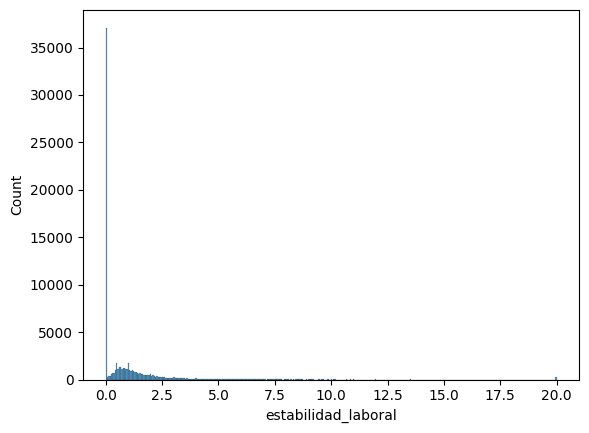

In [22]:
sns.histplot(hv["estabilidad_laboral"])

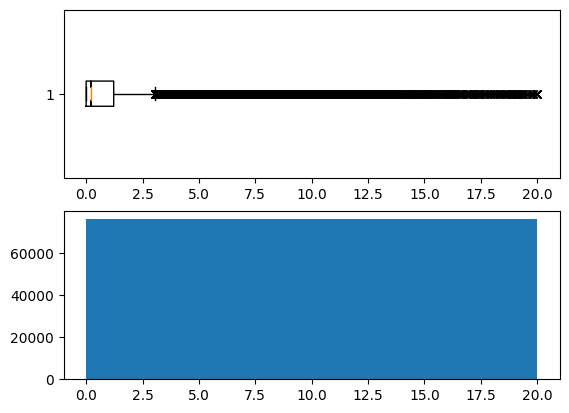

In [23]:
df_plot = hv.copy()
var_plot = 'estabilidad_laboral'
# plot body
plt.figure()
plt.subplot(211)
plt.boxplot(df_plot[var_plot], notch=True, sym="x",vert=False)
plt.subplot(212)
plt.hist(df_plot[var_plot], bins = 1)
plt.show()


In [24]:
hv.to_csv(path_or_buf="c:/Users/CO-149/Downloads/out.csv")

In [25]:
def smart_search(age_minima=18, age_maxima=54, gender=2, palabras_clave=None, nivel_educativo=0,
                    tiempo_experiencia=0, ruta="c:/Users/CO-149/Downloads/out.csv", w_genero=0.06, w_edad=0.06,
                    w_educacion=0.2, w_experiencia=0.15, w_match=0.5, w_ciudad=0.03, ciudad=""):
    """ Función que busca y puntua cada uno de los criterios de busqueda especificados """
    if palabras_clave is None:
        palabras_clave = []
    base = pd.read_csv(ruta)
    lista_puntaje = []
    for x in base.index:
        score = 0
        lista_match = []

        """Ciudad"""
        city = base["ciudad"][x]
        if city == ciudad:
            score = score + w_ciudad
            lista_match.append("ciudad")

        """Genero 0.0625"""
        if gender != 2:
            if base["genero_femenino"][x] == gender:
                score = score + w_genero
                lista_match.append("genero")
        else:
            score = score + w_genero

        """rango de edad  0.0625 """
        try:
            edad = int(base["edad"][x])  # type: ignore
            if edad >= age_minima & edad <= age_maxima:
                score = score + w_edad
                lista_match.append("edad")
        except Exception:
            score = score + 0

        """nivel educativo 0.125"""
        niv_educativo = base["num_nivel_educativo"][x]
        if niv_educativo == nivel_educativo:
            score = score + w_educacion
            lista_match.append("educacion")
        elif niv_educativo >= nivel_educativo:
            score = score + (w_educacion / 2)

        """Experiencia 0.125"""
        experiencia = base["experiencia"][x]
        if experiencia >= tiempo_experiencia:
            score = score + w_experiencia
            lista_match.append("experiencia")

        """Match etiquetas 0.5"""
        num_palabras = len(palabras_clave)
        if num_palabras != 0:
            texto = base["lista_palabras"][x]
            for y in palabras_clave:
                if texto.__contains__(y):
                    lista_match.append(y)
            score = score + ((len(lista_match) / num_palabras) * w_match)
        else:
            score = score + 0.5

        lista_puntaje.append([score, lista_match])

    df = pd.DataFrame(lista_puntaje, columns=["score", "lista_match"])
    hv_final = pd.concat([base, df], axis=1)
    return hv_final

In [26]:
### prueba 1
criterios = ["auxiliar", "bodega", "descargue"]
lista = smart_search(age_minima=18, age_maxima=23, gender=0, palabras_clave=criterios, nivel_educativo=0)
df = pd.DataFrame(lista, columns=["puntaje20", "lista_match"])
final = pd.concat([hv, df], axis=1)
final

C:\Users\CO-149\AppData\Local\Temp\ipykernel_5728\2531583137.py:4: DtypeWarning: Columns (6,13,18,19,27,28,32,34,35,36,37,38,39,40,43,64,73,76,78,80,82,86,87,92,93,95,96,97,98,99,100,101,102,104,105,109,110,111,112,113,117,119,120,121,122,127,128,129,131,133) have mixed types. Specify dtype option on import or set low_memory=False.
  hv = pd.read_csv("c:/Users/CO-149/Downloads/out.csv")


,primer_apellido,segundo_apellido,primer_nombre,segundo_nombre,tipo_de_documento,no_identificacion,nacionalidad,no_pasaporte,fecha_de_nacimiento,edad,...,num_cargos,lista_cargos,lista_estudios,experiencia,info_candidato,lista_palabras,num_nivel_educativo,estabilidad_laboral,puntaje20,lista_match
0,ESPITIA,MUNZA,SHARON,CAMILO,CEDULA DE CIUDADANIA,1076670237,Colombia,NaN,15/07/1999,23.0,...,0,,[],0.000000,,[],0,0.000000,0.312500,[]
1,ORTEGA,HERNANDEZ,EDITH,DELFINA,CEDULA DE CIUDADANIA,1033724167,Colombia,NaN,05/07/1990,32.0,...,0,,[],0.000000,,[],0,0.000000,0.312500,[]
2,SARAVIA,NaN,WILSON,ANTONIO,CEDULA DE CIUDADANIA,88239301,Colombia,NaN,21/09/1979,43.0,...,5,"[[MEMPHIS PRODUCTS S.A, AUXILIAR D EPLANTA , 0...","[[MEDIA ACADEMICA (BACHILLER), 01/01/2000, 01/...",6.347945,brindar servicio de seguridad a claro colombi...,"[, brindar, servicio, de, seguridad, a, claro,...",2,1.269589,0.479167,[auxiliar]
3,CUEVAS,CAMACHO,YEISON,ESTEBEN,CEDULA DE CIUDADANIA,1070988591,Colombia,NaN,22/05/1999,23.0,...,0,,[],0.000000,,[],2,0.000000,0.312500,[]
4,BARRANTES,CICUA,CLAUDIA,CONSTANZA,CEDULA DE CIUDADANIA,52425780,Colombia,NaN,19/10/1977,45.0,...,4,"[[ORGANIZACION SERVICIOS Y ASESORIAS, SUPERVIS...","[[TECNOLOGICA, 01/07/2018, 01/06/2019, , CURSA...",-1.000000,todo el proceso de seguimiento a requisicione...,"[, todo, el, proceso, de, seguimiento, a, requ...",4,0.000000,0.125000,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75967,GARZON,VARGAS,YULIANA,ANDREA,CEDULA DE CIUDADANIA,37292765,Colombia,NaN,27/03/1988,32.0,...,1,"[[NEGOCIO FAMILIAR , VENDEDOR DE MOSTRADOR , 0...","[[MEDIA TECNICA, 11/02/1998, 17/11/2003, BACHI...",9.241096,atencion al cliente despachos y manejo de mer...,"[, atencion, al, cliente, despachos, y, manejo...",3,9.241096,0.250000,[]
75968,TEST,GUZMAN,TEST,ANDRES,CEDULA DE CIUDADANIA,22222,Colombia,NaN,08/11/1997,24.0,...,0,,"[[PROFESIONAL, 01/01/2018, , , CURSANDO, UCC, ]]",0.000000,,[],4,0.000000,0.312500,[]
75969,PEREZ,GUZMAN,JUAN,ANDRES,CEDULA DE CIUDADANIA,11111,Colombia,NaN,08/11/1997,23.0,...,0,,"[[PROFESIONAL, 01/01/2018, , , CURSANDO, UCC, ]]",0.000000,,[],4,0.000000,0.312500,[]
75970,DANIEL,FELIPE,GOMEZ,SUAREZ,CEDULA DE CIUDADANIA,100000001,Colombia,NaN,13/11/1997,24.0,...,2,"[[COOMPHIA, ANALISTA DE RECLUTAMIENTO, 08/07/2...","[[MEDIA ACADEMICA (BACHILLER), 01/01/2009, 08/...",2.906849,test test,"[, test]",0,1.453425,0.375000,[]


In [34]:
final[final["puntaje20"] > 0.8]

,primer_apellido,segundo_apellido,primer_nombre,segundo_nombre,tipo_de_documento,no_identificacion,nacionalidad,no_pasaporte,fecha_de_nacimiento,edad,...,num_cargos,lista_cargos,lista_estudios,experiencia,info_candidato,lista_palabras,num_nivel_educativo,estabilidad_laboral,puntaje20,lista_match
819,MARTINEZ,JACOBO,RICARDO,ANDRES,CEDULA DE CIUDADANIA,1080296208,Colombia,NaN,27/02/1996,26.0,...,3,"[[CONSORCIO CONSTRUCTOR AUTOVIA , AYUDANTE DE ...","[[BASICA PRIMARIA, 13/01/2001, 28/11/2006, BAS...",4.378082,• auxiliar operativo\n• auxiliar de piso \n• ...,"[, •, auxiliar, operativo\n•, de, piso, \n•, o...",2,1.459361,0.937500,"[auxiliar, bodega, descargue]"
932,MARTINEZ,JACOBO,RICARDO,ANDRES,CEDULA DE CIUDADANIA,1193068062,Colombia,NaN,27/02/1996,26.0,...,3,"[[CONSORCIO CONSTRUCTOR AUTOVIA , AYUDANTE DE ...","[[BASICA PRIMARIA, 13/01/2001, 28/11/2006, BAS...",4.378082,• auxiliar operativo\n• auxiliar de piso \n• ...,"[, •, auxiliar, operativo\n•, de, piso, \n•, o...",2,1.459361,0.937500,"[auxiliar, bodega, descargue]"
1087,Hernández,Villabona,Miguel,Angel,CEDULA DE CIUDADANIA,1098730738,Colombia,NaN,28/09/1992,30.0,...,3,"[[Disanmotos , Auxiliar de bodega, 04/11/2014,...","[[MEDIA ACADEMICA (BACHILLER), 20/01/2014, 18/...",1.742466,auxiliar de bodega en alistamiento de pedidos...,"[, auxiliar, de, bodega, en, alistamiento, ped...",2,0.580822,0.937500,"[auxiliar, bodega, descargue]"
1300,CÓRDOBA,CALDERON,RUBÉN,DARIO,CEDULA DE CIUDADANIA,1033799134,Colombia,NaN,24/07/1997,25.0,...,1,"[[EXPRESS CARGA, AUXILIAR DE BODEGA, 01/01/202...","[[MEDIA ACADEMICA (BACHILLER), 01/01/2003, 01/...",-1.000000,me desempeñe mas que todo en el alistamiento ...,"[, me, desempeñe, mas, que, todo, en, el, alis...",2,0.000000,0.812500,"[auxiliar, bodega, descargue]"
1866,CAMARGO,SOCHA,DIEGO,ANTONIO,CEDULA DE CIUDADANIA,1013587379,Colombia,NaN,26/04/1987,35.0,...,3,"[[ONE SIDE, AUXILIAR ALMACÉN DULCES Y BOMBONES...","[[MEDIA ACADEMICA (BACHILLER), 01/02/2010, 01/...",4.583562,cargue y descargue de mercancia ubicacion de ...,"[, cargue, y, descargue, de, mercancia, ubicac...",2,1.527854,0.937500,"[auxiliar, bodega, descargue]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75183,RIVERA,TORRES,JESUS,GIOVANNY,CEDULA DE CIUDADANIA,1016019078,Colombia,NaN,04/04/1989,31.0,...,3,"[[BIMBO DE COLOMBIA, ENTREGADOR GRANDES CLIENT...","[[BASICA SECUNDARIA, 15/01/2001, 12/12/2007, B...",5.619178,revisar producto que se encontrara completoca...,"[, revisar, producto, que, se, encontrara, com...",0,1.873059,0.833333,"[bodega, descargue]"
75190,Gomez,Bustos,Jimmy,Alexander,CEDULA DE CIUDADANIA,79994669,Colombia,NaN,22/09/1980,40.0,...,3,"[[Industrias Metálicas JG, Ayudante de producc...","[[MEDIA TECNICA, 08/02/2016, 18/06/2016, , ABA...",4.950685,produccion e instalacion de estructuras metal...,"[, produccion, e, instalacion, de, estructuras...",0,1.650228,0.833333,"[bodega, descargue]"
75595,SANCHEZ,HERNANDEZ,CHRISTIAN,CAMILO,CEDULA DE CIUDADANIA,1010209261,Colombia,NaN,05/07/1993,27.0,...,2,"[[RESEARCH PHARMACEUTICAL, AUXILIAR DE BODEGA ...","[[MEDIA ACADEMICA (BACHILLER), 30/01/2006, 30/...",5.205479,cargue y descargue de mercancia alistamiento ...,"[, cargue, y, descargue, de, mercancia, alista...",0,2.602740,0.833333,"[bodega, descargue]"
75899,Conde,Herrera,Anderson,Steven,CEDULA DE CIUDADANIA,1121884093,Colombia,NaN,07/06/1991,29.0,...,2,"[[Trefilados de colombia , Auxiliar de bodega ...","[[MEDIA ACADEMICA (BACHILLER), 01/01/2009, 01/...",2.457534,auxiliar de bodega \ncargue descargue inventa...,"[, auxiliar, de, bodega, \ncargue, descargue, ...",0,1.228767,1.000000,"[auxiliar, bodega, descargue]"


In [28]:
final["ciudad"]

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
                ...        
75967    NORTE DE SANTANDER
75968                BOGOTA
75969                BOGOTA
75970                SOACHA
75971                  TEST
Name: ciudad, Length: 75972, dtype: object